In [99]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data = pd.read_csv('data/converted_test_2020_06_16_09-31-01.csv',parse_dates=['Flight_Date','Request_Date'])

In [101]:
data

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-07-28 11:00:00,2019-07-29 18:00:00,31.0,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€,73.43,Sunday,AM
1,1,2019-07-28 11:00:00,2019-07-29 22:00:00,35.0,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€,180.53,Sunday,AM
2,2,2019-07-28 11:00:00,2019-07-30 06:00:00,43.0,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€,61.19,Sunday,AM
3,3,2019-07-28 23:00:00,2019-07-30 06:00:00,31.0,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€,73.43,Sunday,PM
4,4,2019-07-28 11:00:00,2019-07-30 10:00:00,47.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€,180.53,Sunday,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,5119,2019-07-31 23:00:00,2019-09-10 10:00:00,971.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€,35.69,Wednesday,PM
5120,5120,2019-08-01 11:00:00,2019-09-10 10:00:00,959.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€,35.69,Thursday,AM
5121,5121,2019-08-01 23:00:00,2019-09-10 10:00:00,947.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,46.83,Thursday,PM
5122,5122,2019-08-02 11:00:00,2019-09-10 10:00:00,935.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,46.83,Friday,AM


In [102]:
data.dtypes

Unnamed: 0                   int64
Request_Date        datetime64[ns]
Flight_Date         datetime64[ns]
Duration_Time              float64
Departure_hour               int64
flight_unique_id            object
route_abb                   object
flight_number               object
Price                      float64
Currency                    object
price_in_eur               float64
Request_Weekday             object
Request_AM_PM               object
dtype: object

In [103]:
data.Request_Date.min()

Timestamp('2019-07-28 11:00:00')

In [104]:
data.Request_Date.max()

Timestamp('2019-08-02 23:00:00')

In [105]:
data.Flight_Date.min()

Timestamp('2019-07-29 18:00:00')

In [106]:
data.Flight_Date.max()

Timestamp('2019-09-10 10:00:00')

In [80]:
data.groupby(data.flight_unique_id=='2019-09-10 FR 8543').size()

flight_unique_id
False    5112
True       12
dtype: int64

In [31]:
##number of total requested flights per route, min, max, mean price
data.groupby('route_abb').price_in_eur.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
route_abb,,,,
FRA-STN,929,12.990000,311.090000,87.825662
STN-FRA,899,11.713473,243.054591,67.697934
STN-SXF,1588,11.713473,210.854971,67.095134
SXF-STN,1708,12.990000,266.130000,100.096470


In [6]:
##min, max, mean price for each flight with the same flight number
data.groupby('flight_number').price_in_eur.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
flight_number,,,,
FR 144,482,17.990000,266.130000,83.544232
FR 145,447,11.713473,207.529888,69.378107
FR 146,397,42.830000,264.130000,124.386474
FR 147,382,11.713473,210.479801,70.835918
FR 1546,468,12.990000,311.090000,100.213761
FR 1547,455,11.713473,241.720685,73.453787
FR 1686,461,12.990000,254.990000,75.249458
FR 1687,444,11.713473,243.054591,61.799480
FR 8542,388,11.713473,210.854971,61.253138


In [7]:
##min, max, mean price for each unique flight
data.groupby('flight_unique_id').price_in_eur.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
flight_unique_id,,,,
2019-07-29 FR 146,1,73.430000,73.430000,73.430000
2019-07-29 FR 8545,1,180.530000,180.530000,180.530000
2019-07-30 FR 144,2,61.190000,73.430000,67.310000
2019-07-30 FR 146,3,152.990000,152.990000,152.990000
2019-07-30 FR 8543,2,180.530000,180.530000,180.530000
...,...,...,...,...
2019-09-09 FR 8545,12,61.190000,77.430000,64.230000
2019-09-10 FR 144,12,29.570000,50.990000,37.475000
2019-09-10 FR 145,12,24.824627,28.971513,26.942992


# Plots with pricing for specific flights

In [8]:
%matplotlib inline

In [12]:
sns.set(rc={'figure.figsize':(11, 4)})

In [136]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.groupby(['route_abb', 'flight_number', 'flight_unique_id', 'Request_Date']).size()

route_abb  flight_number  flight_unique_id    Request_Date       
FRA-STN    FR 1546        2019-07-31 FR 1546  2019-07-28 11:00:00    1
                                              2019-07-28 23:00:00    1
                          2019-08-01 FR 1546  2019-07-28 11:00:00    1
                                              2019-07-28 23:00:00    1
                                              2019-07-29 11:00:00    1
                                                                    ..
SXF-STN    FR 8545        2019-09-09 FR 8545  2019-07-31 23:00:00    1
                                              2019-08-01 11:00:00    1
                                              2019-08-01 23:00:00    1
                                              2019-08-02 11:00:00    1
                                              2019-08-02 23:00:00    1
Length: 5124, dtype: int64

In [148]:
##shows the number of price changes for each flight
test1 = data.groupby(['route_abb','flight_unique_id'])['price_in_eur'].nunique()
test1

route_abb  flight_unique_id  
FRA-STN    2019-07-31 FR 1546     1
           2019-08-01 FR 1546     4
           2019-08-01 FR 1686     4
           2019-08-02 FR 1546     2
           2019-08-02 FR 1686     3
           2019-08-03 FR 1546     4
           2019-08-03 FR 1686     3
           2019-08-04 FR 1546     2
           2019-08-04 FR 1686     3
           2019-08-05 FR 1546     6
           2019-08-05 FR 1686     7
           2019-08-06 FR 1546     4
           2019-08-06 FR 1686     5
           2019-08-07 FR 1546     5
           2019-08-07 FR 1686     7
           2019-08-08 FR 1546     5
           2019-08-08 FR 1686     4
           2019-08-09 FR 1546     4
           2019-08-09 FR 1686     6
           2019-08-10 FR 1546     3
           2019-08-10 FR 1686     4
           2019-08-11 FR 1546     3
           2019-08-11 FR 1686     4
           2019-08-12 FR 1546     7
           2019-08-12 FR 1686     4
           2019-08-13 FR 1546     4
           2019-08-13 FR 1686     

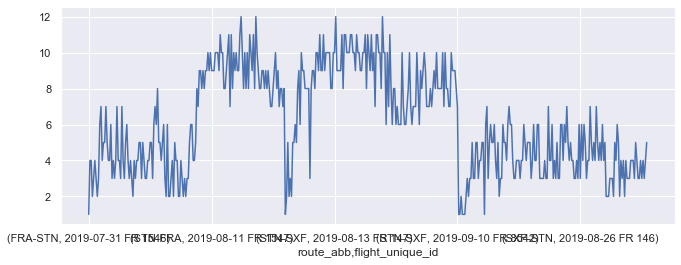

In [143]:
##plot shiws number of price changes for each flight
test1.plot()

In [108]:
##the price changes 5 times for the flight 2019-09-10 FR 8543
df = data.groupby(data.flight_unique_id=='2019-09-10 FR 8543')['price_in_eur'].nunique()
df

flight_unique_id
False    364
True       5
Name: price_in_eur, dtype: int64

In [140]:
##the values of the price changes for flight 2019-09-10 FR 8543, look at the True values
##the min = 12.99 and max = 46.83
test = data.groupby(data.flight_unique_id =='2019-09-10 FR 8543').price_in_eur.value_counts()
test

flight_unique_id  price_in_eur
False             50.990000       205
                  106.070000      195
                  88.730000       180
                  73.430000       169
                  75.470000       168
                  126.470000      168
                  61.190000       148
                  152.990000      141
                  62.210000       114
                  91.790000        97
                  42.830000        93
                  35.690000        90
                  180.530000       86
                  111.170000       72
                  132.590000       69
                  29.570000        63
                  211.130000       59
                  157.070000       55
                  262.130000       48
                  41.810000        45
                  18.291850        44
                  18.315438        43
                  28.962030        41
                  18.220885        40
                  16.270696        39
                  2

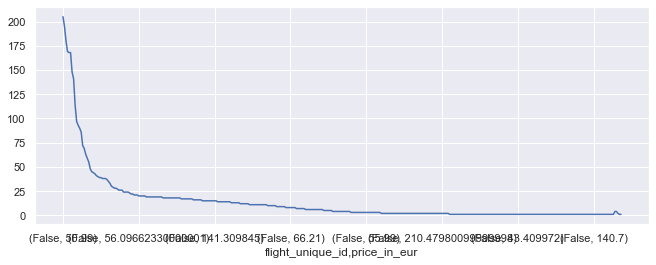

In [141]:
##data.price_in_eur.value_counts().sort_index().plot()
test.plot()

In [22]:
#data['route_abb_num'] = data.route_abb.map({'FRA-STN':0, 'STN-FRA':1, 'STN-SXF':2, 'SXF-STN':3})

flight_number
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_in_eur, dtype: object

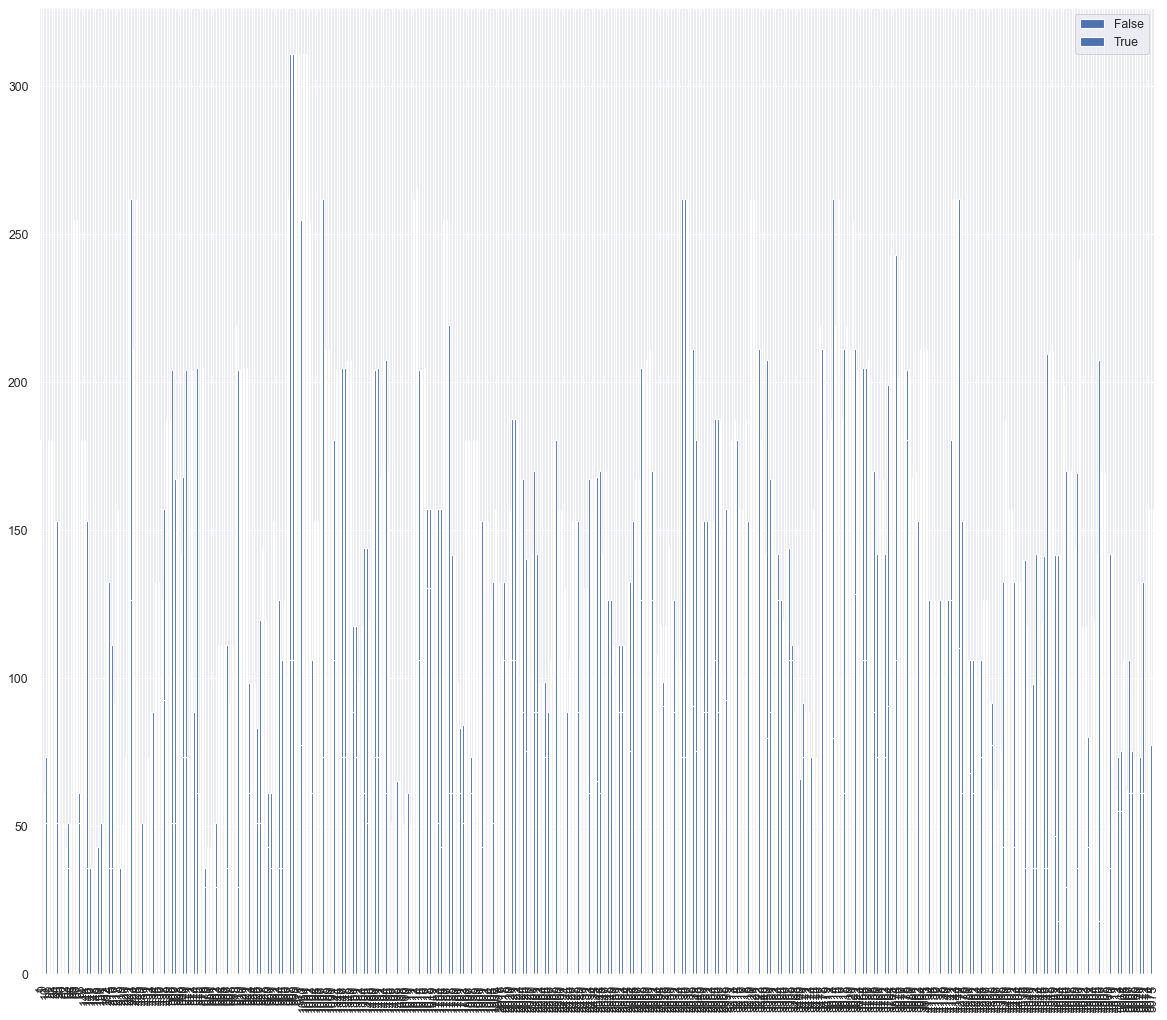

In [55]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
data.groupby(data.flight_number=='FR 8545').price_in_eur.plot(kind='bar', legend=True)

flight_unique_id
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_in_eur, dtype: object

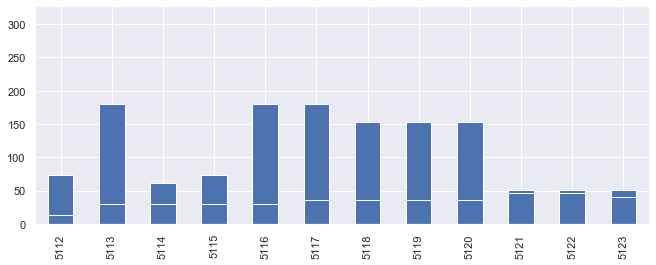

In [16]:
data.groupby(data.flight_unique_id=='2019-09-10 FR 8543').price_in_eur.plot(kind='bar')

# Plot for pricing at AM and PM

In [13]:
data['Request_AM_PM_num'] = data.Request_AM_PM.map({'AM':0, 'PM':1})

In [14]:
data.loc[0:4, ['Request_AM_PM', 'Request_AM_PM_num']]

,Request_AM_PM,Request_AM_PM_num
0,AM,0
1,AM,0
2,AM,0
3,PM,1
4,AM,0


In [45]:
my_plot = data.plot(data.flight_unique_id=='2019-09-10 FR 8543').plot

TypeError: '0       False
1       False
2       False
3       False
4       False
        ...  
5119    False
5120    False
5121    False
5122    False
5123    False
Name: Flight_Date, Length: 5124, dtype: bool' is an invalid key